# 2-layer FNN on MNIST

This is MLP (784-200-200-10) on MNIST. Adam algorithm (lr=0.001) with 100 epoches.


#### 100 hidden units

    Total params: 89,610
    Trainable params: 89,610
    Non-trainable params: 0

####  200 hidden units

    Total params: 199,210
    Trainable params: 199,210
    Non-trainable params: 0

####  200 hidden units with 10 intrinsic dim

    Total params: 2,191,320
    Trainable params: 10
    Non-trainable params: 2,191,310
    
####  200 hidden units with 5000 intrinsic dim    
    Total params: 996,254,210
    Trainable params: 5,000
    Non-trainable params: 996,249,210    

In [168]:
import os, sys
import numpy as np
from matplotlib.pyplot import *
%matplotlib inline

In [194]:
results_dir = '../results'


class Results():
    def __init__(self):
        self.train_loss     = []
        self.train_accuracy = []
        self.train_loss = []
        self.valid_loss = []
        self.run_time   = []
        
    def add_entry(self, train_loss, train_accuracy, valid_loss, valid_accuracy, run_time):
        self.train_loss.append(train_loss)
        self.train_accuracy.append(train_accuracy)
        self.train_loss.append(train_loss)
        self.valid_loss.append(valid_loss)
        self.run_time.append(run_time)
      
    def add_entry_list(self, entry):
        self.add_entry(entry[0], entry[1], entry[2], entry[3], entry[4])
        
    def list2np(self):
        self.train_loss     = []
        self.train_accuracy = []
        self.train_loss = []
        self.valid_loss = []
        self.run_time   = []        

dim = [10, 50, 100, 300, 500, 1000, 2000, 3000, 4000, 5000]
i = 0        

# filename list of diary
diary_names = []
for subdir, dirs, files in os.walk(results_dir):
    for file in files:
        if file == 'diary':
            fname = os.path.join(subdir, file)
            diary_names.append(fname)
  
diary_names_ordered = []
for d in dim:
    for f in diary_names:
        if str(d)+'/' in f:
            # print "%d is in" % d + f
            diary_names_ordered.append(f)
        if '_200dir/' in f:
            diary_names_dir = f
        if '_dir/' in f:
            diary_names_dir_100 = f            
 

# extrinsic update  method
with open(diary_names_dir,'r') as ff:
    lines0 = ff.readlines()
    R_dir = extract_num(lines0)

with open(diary_names_dir_100,'r') as ff:
    lines0 = ff.readlines()
    R_dir_100 = extract_num(lines0)
    
    
print "200 hiddent units:\n" + str(R_dir) + "\n"
print "100 hiddent units:\n" + str(R_dir_100) + "\n" 


# intrinsic update method
Rs = []
i = 0
for fname in diary_names_ordered:
    with open(fname,'r') as ff:
        lines0 = ff.readlines()
        R = extract_num(lines0)
        print "%d dim:\n"%dim[i] + str(R) + "\n"
        i += 1

        Rs.append(R)
                            
Rs = np.array(Rs)




200 hiddent units:
(0.189223, 0.9799, 0.000443476, 0.99988, 130.689)

100 hiddent units:
(0.209104, 0.9762, 0.000937227, 0.9997, 67.9818)

10 dim:
(2.28143, 0.148, 2.2858, 0.15498, 112.831)

50 dim:
(1.71806, 0.4069, 1.74416, 0.40236, 113.329)

100 dim:
(1.3122, 0.5669, 1.35212, 0.55128, 116.139)

300 dim:
(0.609013, 0.8068, 0.643988, 0.79478, 136.209)

500 dim:
(0.438253, 0.8662, 0.456212, 0.86158, 159.758)

1000 dim:
(0.293679, 0.9095, 0.296019, 0.91144, 216.802)

2000 dim:
(0.211655, 0.9352, 0.195016, 0.94168, 351.066)

3000 dim:
(0.165178, 0.9477, 0.143844, 0.9572, 579.501)

4000 dim:
(0.14892, 0.954, 0.113969, 0.96642, 870.157)

5000 dim:
(0.132843, 0.9596, 0.0855529, 0.9755, 960.53)



In [187]:
def extract_num(lines0):

    valid_loss_str     = lines0[-5]
    valid_accuracy_str = lines0[-6]
    train_loss_str     = lines0[-8]
    train_accuracy_str = lines0[-9]
    run_time_str       = lines0[-10]

    valid_loss     = float(valid_loss_str.split( )[-1])
    valid_accuracy = float(valid_accuracy_str.split( )[-1])
    train_loss     = float(train_loss_str.split( )[-1])
    train_accuracy = float(train_accuracy_str.split( )[-1])
    run_time       = float(run_time_str.split( )[-1])
    
    return valid_loss, valid_accuracy, train_loss, train_accuracy, run_time

## Performance comparison with Baseline

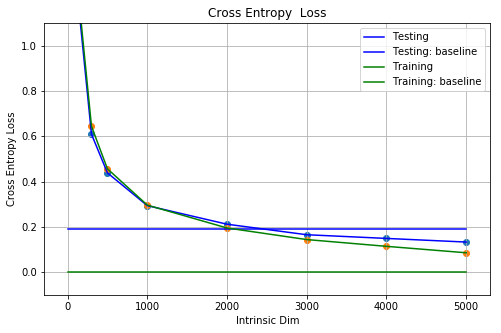

In [188]:
N = 10
fig, ax = subplots(1)
ax.plot(dim, Rs[:,0],'b-', label="Testing")
ax.plot(dim, R_dir[0]*np.ones(N),'b-', label="Testing: baseline")
ax.plot(dim, Rs[:,2],'g-', label="Training")
ax.plot(dim, R_dir[2]*np.ones(N),'g-', label="Training: baseline")

ax.scatter(dim, Rs[:,0])
ax.scatter(dim, Rs[:,2])


ax.set_xlabel('Intrinsic Dim')
ax.set_ylabel('Cross Entropy Loss')
ax.set_title('Cross Entropy  Loss')
ax.legend()
ax.grid()
ax.set_ylim([-0.1,1.1])
fig.set_size_inches(8, 5)

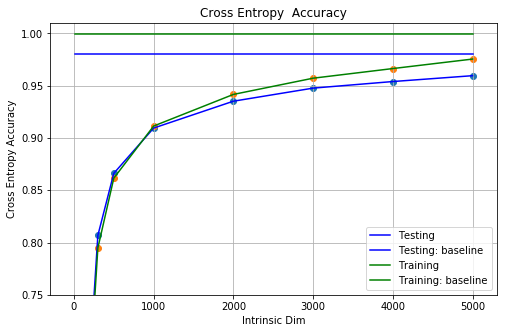

In [189]:
fig, ax = subplots(1)
ax.plot(dim, Rs[:,1],'b-', label="Testing")
ax.plot(dim, R_dir[1]*np.ones(N),'b-', label="Testing: baseline")
ax.plot(dim, Rs[:,3],'g-', label="Training")
ax.plot(dim, R_dir[3]*np.ones(N),'g-', label="Training: baseline")
ax.scatter(dim, Rs[:,1])
ax.scatter(dim, Rs[:,3])

ax.set_xlabel('Intrinsic Dim')
ax.set_ylabel('Cross Entropy Accuracy')
ax.set_title('Cross Entropy  Accuracy')
ax.legend()
ax.grid()
ax.set_ylim([0.75,1.01])
fig.set_size_inches(8, 5)

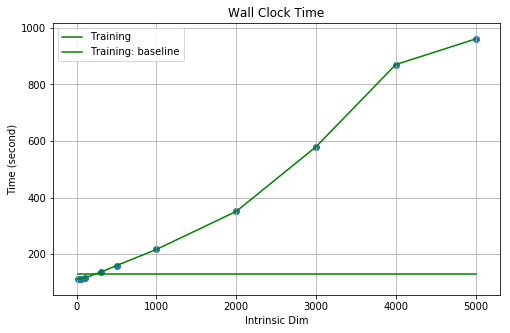

In [190]:
fig, ax = subplots(1)
ax.plot(dim, Rs[:,4],'g-', label="Training")
ax.plot(dim, R_dir[4]*np.ones(N),'g-', label="Training: baseline")
ax.scatter(dim, Rs[:,4])

ax.set_xlabel('Intrinsic Dim')
ax.set_ylabel('Time (second)')
ax.set_title('Wall Clock Time')
ax.legend()
ax.grid()
# ax.set_ylim([0.75,100.01])
fig.set_size_inches(8, 5)

## Performance Per Dim

[[  2.28143000e-01   1.48000000e-02   2.28580000e-01   1.54980000e-02
    1.12831000e+01]
 [  3.43612000e-02   8.13800000e-03   3.48832000e-02   8.04720000e-03
    2.26658000e+00]
 [  1.31220000e-02   5.66900000e-03   1.35212000e-02   5.51280000e-03
    1.16139000e+00]
 [  2.03004333e-03   2.68933333e-03   2.14662667e-03   2.64926667e-03
    4.54030000e-01]
 [  8.76506000e-04   1.73240000e-03   9.12424000e-04   1.72316000e-03
    3.19516000e-01]
 [  2.93679000e-04   9.09500000e-04   2.96019000e-04   9.11440000e-04
    2.16802000e-01]
 [  1.05827500e-04   4.67600000e-04   9.75080000e-05   4.70840000e-04
    1.75533000e-01]
 [  5.50593333e-05   3.15900000e-04   4.79480000e-05   3.19066667e-04
    1.93167000e-01]
 [  3.72300000e-05   2.38500000e-04   2.84922500e-05   2.41605000e-04
    2.17539250e-01]
 [  2.65686000e-05   1.91920000e-04   1.71105800e-05   1.95100000e-04
    1.92106000e-01]]


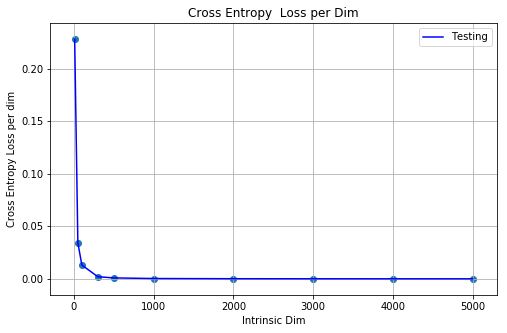

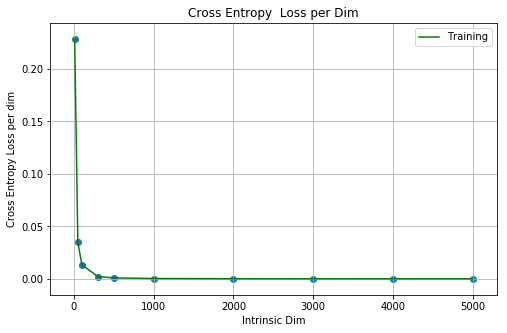

In [191]:
NRs = Rs/np.array(dim).reshape(N,1)
print NRs

fig, ax = subplots(1)
ax.plot(dim, NRs[:,0],'b-', label="Testing")
ax.scatter(dim, NRs[:,0])

ax.set_xlabel('Intrinsic Dim')
ax.set_ylabel('Cross Entropy Loss per dim')
ax.set_title('Cross Entropy  Loss per Dim')
ax.legend()
ax.grid()
fig.set_size_inches(8, 5)

fig, ax = subplots(1)
ax.plot(dim, NRs[:,2],'g-', label="Training")
ax.scatter(dim, NRs[:,2])

ax.set_xlabel('Intrinsic Dim')
ax.set_ylabel('Cross Entropy Loss per dim')
ax.set_title('Cross Entropy  Loss per Dim')
ax.legend()
ax.grid()
fig.set_size_inches(8, 5)

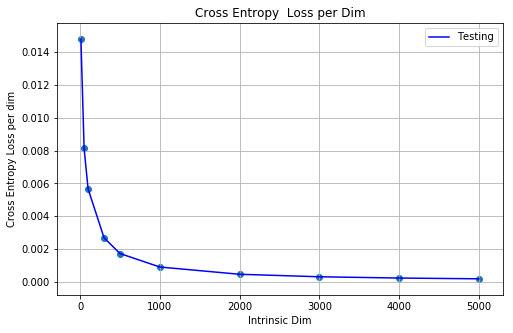

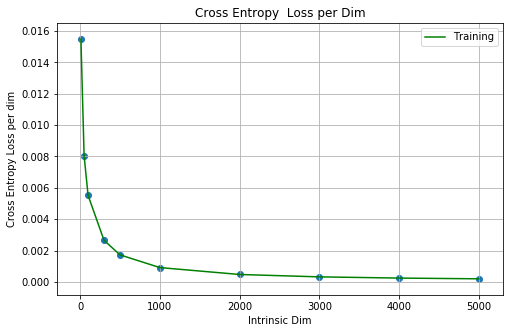

In [192]:
fig, ax = subplots(1)
ax.plot(dim, NRs[:,1],'b-', label="Testing")
ax.scatter(dim, NRs[:,1])

ax.set_xlabel('Intrinsic Dim')
ax.set_ylabel('Cross Entropy Loss per dim')
ax.set_title('Cross Entropy  Loss per Dim')
ax.legend()
ax.grid()
fig.set_size_inches(8, 5)

fig, ax = subplots(1)
ax.plot(dim, NRs[:,3],'g-', label="Training")
ax.scatter(dim, NRs[:,3])

ax.set_xlabel('Intrinsic Dim')
ax.set_ylabel('Cross Entropy Loss per dim')
ax.set_title('Cross Entropy  Loss per Dim')
ax.legend()
ax.grid()
fig.set_size_inches(8, 5)

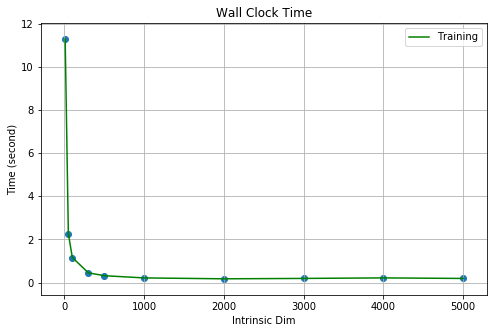

In [193]:
fig, ax = subplots(1)
ax.plot(dim, NRs[:,4],'g-', label="Training")
ax.scatter(dim, NRs[:,4])

ax.set_xlabel('Intrinsic Dim')
ax.set_ylabel('Time (second)')
ax.set_title('Wall Clock Time')
ax.legend()
ax.grid()
# ax.set_ylim([0.75,100.01])
fig.set_size_inches(8, 5)